In [1]:
import timeit
import torch

In [20]:
import platform
platform.platform()
import psutil
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

Physical cores: 6
Total cores: 12


In [2]:
print(torch.__config__.parallel_info())

ATen/Parallel:
	at::get_num_threads() : 1
	at::get_num_interop_threads() : 6
OpenMP not found
Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
	mkl_get_max_threads() : 6
Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
std::thread::hardware_concurrency() : 12
Environment variables:
	OMP_NUM_THREADS : [not set]
	MKL_NUM_THREADS : [not set]
ATen parallel backend: OpenMP



In [3]:
# taken from https://pytorch.org/docs/master/notes/cpu_threading_torchscript_inference.html

runtimes = []
threads = [1] + [t for t in range(2, 49, 2)]

for t in threads:
    torch.set_num_threads(t)
    r = timeit.timeit(setup = "import torch; x = torch.randn(1024, 1024); y = torch.randn(1024, 1024)", stmt="torch.mm(x, y)", number=100)
    runtimes.append(r)

In [4]:
print(torch.__config__.parallel_info())

ATen/Parallel:
	at::get_num_threads() : 1
	at::get_num_interop_threads() : 6
OpenMP not found
Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
	mkl_get_max_threads() : 48
Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
std::thread::hardware_concurrency() : 12
Environment variables:
	OMP_NUM_THREADS : [not set]
	MKL_NUM_THREADS : [not set]
ATen parallel backend: OpenMP



In [5]:
import matplotlib.pyplot as plt

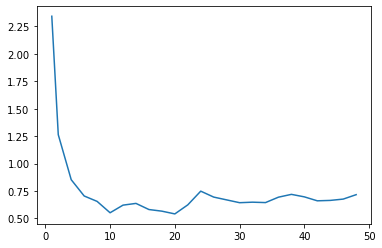

In [6]:
plt.plot(threads, runtimes)

In [7]:
runtimes

[2.3424580770079046,
 1.2631217449961696,
 0.8526434910017997,
 0.7042654719989514,
 0.6549168510100571,
 0.5513739809975959,
 0.6209232729888754,
 0.6366201929922681,
 0.5808213069976773,
 0.5659489870013203,
 0.5408423000044422,
 0.6233479740039911,
 0.748299394006608,
 0.6942999430029886,
 0.6687067829916487,
 0.6430940830032341,
 0.6477856480050832,
 0.6441282110026805,
 0.6933815560041694,
 0.7190020540001569,
 0.6962872610019986,
 0.6602774769999087,
 0.6639568630052963,
 0.67592691500613,
 0.7162869400053751]

In [8]:
threads

[1,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48]